**Tayyaba Bagwan        Rollno:03        Practical:1**



**Import Libraries and Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
data = pd.read_csv("/kaggle/input/the-boston-houseprice-data/boston.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Preprocess the Data**

In [3]:
# Separate features (independent variables) and target (dependent variable)
# 'MEDV' is the target column representing the house price
X = data.drop("MEDV", axis=1)  # Drop 'MEDV' to get all input features
y = data["MEDV"]               # Store the target values (house prices)

In [4]:
# Split the dataset into training and testing sets
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the feature data (important for neural networks)
# This scales the features to have mean 0 and standard deviation 1
scaler = StandardScaler()         # Create a scaler object
X_train = scaler.fit_transform(X_train)  # Fit to training data and transform it
X_test = scaler.transform(X_test)       # Use the same scaler to transform the test data

**Build and Train the Model**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(1))
#input_shape=(13,) means the model expects 13 input values for each example (which is exactly what X_train has).
#A hidden layer with 64 neurons and ReLU activation
#An output layer with 1 neuron (for regression)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
# - optimizer: 'adam' is a popular optimizer that adjusts learning rate automatically
# - loss: 'mse' (Mean Squared Error) is used for regression problems
# - metrics: 'mae' (Mean Absolute Error) to evaluate how far predictions are from actual values
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
# - X_train, y_train: training data
# - epochs=100: train the model for 100 full passes over the data
# - validation_split=0.2: use 20% of training data for validation
# - verbose=1: show training progress
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 600.5128 - mae: 22.7127 - val_loss: 539.7916 - val_mae: 21.6878
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 623.1648 - mae: 23.0193 - val_loss: 522.5780 - val_mae: 21.2920
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 584.7467 - mae: 22.0306 - val_loss: 505.5726 - val_mae: 20.8880
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 561.3614 - mae: 21.7492 - val_loss: 488.0917 - val_mae: 20.4609
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 538.3051 - mae: 21.2349 - val_loss: 469.7370 - val_mae: 20.0092
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 510.0161 - mae: 20.6419 - val_loss: 450.9522 - val_mae: 19.5415
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 474.3269 - mae: 19.8629 - val_loss: 431.2523 - val_mae: 19.0405
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 457.9587 - mae: 19.2586 - val_loss: 410.5273 - val_mae: 18.5058
Epoch 9/100
11/

**Evaluate the Model**

In [10]:
# Evaluate the model on the test dataset
# This calculates the loss (Mean Squared Error) and MAE (Mean Absolute Error) on unseen data
loss, mae = model.evaluate(X_test, y_test)

# Print the MAE value
# MAE tells us how far our predictions are from the actual values, on average
print("Mean Absolute Error on Test Set:", mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.1053 - mae: 2.8713 
Mean Absolute Error on Test Set: 2.990668296813965


**Plot the Loss**

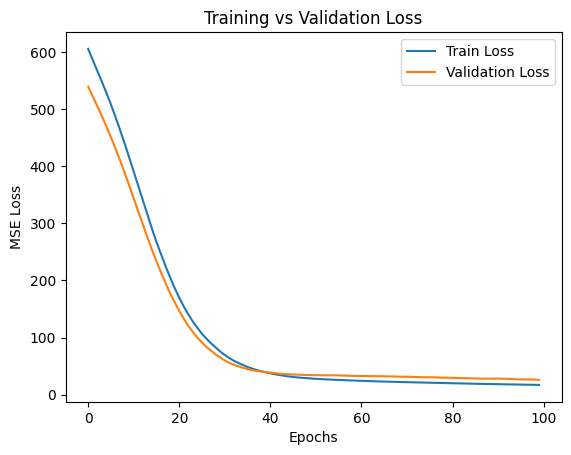

In [11]:
# Plot training and validation loss to see how the model is learning

# Plot the training loss over epochs
plt.plot(history.history['loss'], label='Train Loss')

# Plot the validation loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')

# Label the x-axis as "Epochs"
plt.xlabel("Epochs")

# Label the y-axis as "MSE Loss" (Mean Squared Error)
plt.ylabel("MSE Loss")

# Show the legend to distinguish between train and validation lines
plt.legend()

# Add a title to the plot
plt.title("Training vs Validation Loss")

# Display the plot
plt.show()
